In [5]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
#import joypy
from matplotlib import cm
import requests
import json
#from bs4 import BeautifulSoup
import datetime
#from geopy.distance import geodesic
from tqdm import tqdm
import numpy as np


In [6]:
raw_df = pd.DataFrame()
for csv in os.listdir("./src/data/raw_data/for training"):
    df = pd.read_csv("./src/data/raw_data/for training/{}".format(csv))
    raw_df = pd.concat([raw_df,df])
    
raw_df = raw_df.reset_index(drop = True)

In [7]:
print(raw_df.shape)
columns = raw_df.columns
print(columns)


(117527, 11)
Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')


In [8]:
raw_df.isnull().any()

month                  False
town                   False
flat_type              False
block                  False
street_name            False
storey_range           False
floor_area_sqm         False
flat_model             False
lease_commence_date    False
remaining_lease        False
resale_price           False
dtype: bool

In [9]:
for column in columns:
    print(f"{column}: {raw_df[column].isna().sum()/len(raw_df) * 100}")

month: 0.0
town: 0.0
flat_type: 0.0
block: 0.0
street_name: 0.0
storey_range: 0.0
floor_area_sqm: 0.0
flat_model: 0.0
lease_commence_date: 0.0
remaining_lease: 0.0
resale_price: 0.0


In [10]:
raw_df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
dtype: object

In [11]:
categorical_variables = ["town","flat_type","storey_range","flat_model"]
continous_variables = ["floor_area_sqm"]
target_variable = ["resale_price"]

In [12]:
raw_df[categorical_variables].describe()

,town,flat_type,storey_range,flat_model
count,117527,117527,117527,117527
unique,26,7,17,20
top,SENGKANG,4 ROOM,04 TO 06,Model A
freq,9027,48472,27658,37431


In [13]:
raw_df[continous_variables].describe()

,floor_area_sqm
count,117527.000000
mean,97.428947
std,24.259687
min,31.000000
25%,77.000000
50%,95.000000
75%,112.000000
max,280.000000


In [14]:
def categorical_variable_analysis(df, cat_var, target_var):


    fig, ax =plt.subplots(2,1,figsize=(20,10))

    # count_df = pd.DataFrame(df.groupby(by=[cat_var]).size().sort_values(ascending=False)).reset_index()
    # count_df.columns = [cat_var,"count"]
    # sns.barplot(data = count_df, x = "count", y=cat_var, ax=ax[0])
    sns.boxplot(y=df[target_var], x=df[cat_var], order=df[cat_var], ax=ax[1])

    plt.show()


    

In [15]:
from sklearn.model_selection import train_test_split
X = raw_df.loc[:, raw_df.columns != "resale_price"]
Y = raw_df.loc[:, ["resale_price"]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, train_size = .80)

train_df = X_train.copy()
train_df["resale_price"] = Y_train
train_df = train_df.reset_index(drop = True)

test_df = X_test.copy()
test_df["resale_price"] = Y_test
test_df = test_df.reset_index(drop = True)

print("Size of train set: {}".format(len(train_df)))
print("Size of test set: {}".format(len(test_df)))

Size of train set: 94021
Size of test set: 23506


In [16]:
train_df_EDA = train_df.copy()

In [17]:
train_df_EDA["year_month"] = train_df_EDA["month"]
train_df_EDA["year"] = train_df_EDA["month"].apply(lambda x: int(x[0:4]))
train_df_EDA["month"] = train_df_EDA["month"].apply(lambda x: int(x[-2:]))
train_df_EDA.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_month,year
0,4,QUEENSTOWN,4 ROOM,60,STRATHMORE AVE,07 TO 09,96.0,Model A,2000,81 years 06 months,580000.0,2018-04,2018
1,6,SENGKANG,4 ROOM,299A,COMPASSVALE ST,04 TO 06,94.0,Premium Apartment,2001,81 years 02 months,342000.0,2019-06,2019
2,8,JURONG EAST,3 ROOM,225A,JURONG EAST ST 21,01 TO 03,67.0,New Generation,1984,65 years 04 months,240000.0,2018-08,2018
3,6,SENGKANG,4 ROOM,329B,ANCHORVALE ST,04 TO 06,93.0,Model A,2015,94 years 04 months,433000.0,2020-06,2020
4,6,YISHUN,5 ROOM,935,YISHUN CTRL 1,01 TO 03,125.0,Improved,1993,72 years 08 months,475000.0,2019-06,2019
5,11,JURONG WEST,5 ROOM,654B,JURONG WEST ST 61,13 TO 15,110.0,Improved,2002,83 years 10 months,498000.0,2017-11,2017
6,9,JURONG WEST,3 ROOM,916,JURONG WEST ST 91,07 TO 09,73.0,Model A,1988,69 years 10 months,270000.0,2017-09,2017
7,10,PASIR RIS,5 ROOM,415,PASIR RIS DR 6,04 TO 06,122.0,Improved,1990,71 years 05 months,477000.0,2017-10,2017
8,6,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1980,59 years 09 months,249000.0,2019-06,2019
9,9,KALLANG/WHAMPOA,3 ROOM,16,UPP BOON KENG RD,04 TO 06,65.0,Improved,1975,54 years 05 months,380000.0,2019-09,2019


## Adjusting prices for inflation

In [18]:
cpi = pd.read_csv("./src/data/cpi.csv")
months = {"Jan":"01","Feb":"02","Mar":"03","Apr":"04","May":"05","Jun":"06","Jul":"07","Aug":"08","Sep":"09","Oct":"10","Nov":"11","Dec":"12"}
cpi["year"] = cpi["month"].apply(lambda x: x[0:4])
cpi["month"] = cpi["month"].apply(lambda x: x[-3:])
cpi["month"] = cpi["month"].map(months)
cpi["year_month"] = cpi.apply(lambda x: x["year"] + "-" + x["month"], axis = 1)
cpi = cpi[["year_month","cpi"]]

cpi


,year_month,cpi
0,1961-01,26.553
1,1961-02,26.669
2,1961-03,26.553
3,1961-04,26.650
4,1961-05,26.728
...,...,...
712,2020-05,100.498
713,2020-06,100.487
714,2020-07,98.266
715,2020-08,99.849


In [19]:
train_df_EDA = pd.merge(train_df_EDA,cpi, how="left", left_on = "year_month", right_on = "year_month")
train_df_EDA['real_price'] = (train_df_EDA['resale_price'] / train_df_EDA['cpi']) * 100 

train_df_EDA = train_df_EDA[['year','month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease',"real_price"]]

## Town

In [20]:
towns_count = pd.DataFrame(train_df_EDA.groupby(by=["town"]).count()["real_price"]).rename(columns={"real_price":"count"})
towns_median = pd.DataFrame(train_df_EDA.groupby(by=["town"]).median()["real_price"]).rename(columns={"real_price":"median_real_price"})
towns_std = pd.DataFrame(train_df_EDA.groupby(by=["town"]).std()["real_price"]).rename(columns={"real_price":"stdev_real_price"})

town_df = pd.merge(towns_count, towns_median, left_index = True, right_index = True, how = "inner")
town_df = pd.merge(town_df, towns_std, left_index = True, right_index = True, how = "inner")
town_df = town_df.sort_values(by=["median_real_price"], ascending = False)
town_df = town_df.reset_index(drop = False)
town_df

C:\Users\angus\AppData\Local\Temp/ipykernel_15060/3382318086.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  towns_median = pd.DataFrame(train_df_EDA.groupby(by=["town"]).median()["real_price"]).rename(columns={"real_price":"median_real_price"})
C:\Users\angus\AppData\Local\Temp/ipykernel_15060/3382318086.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  towns_std = pd.DataFrame(train_df_EDA.groupby(by=["town"]).std()["real_price"]).rename(columns={"real_price":"stdev_real_price"})


,town,count,median_real_price,stdev_real_price
0,BUKIT TIMAH,254,686270.153204,183097.594036
1,BISHAN,1804,593946.247098,175429.324380
2,BUKIT MERAH,3557,555969.223132,202056.618208
3,CENTRAL AREA,873,533192.122634,242462.288691
4,QUEENSTOWN,2475,525020.210553,216746.944796
5,PASIR RIS,2928,454132.606721,97391.698071
6,MARINE PARADE,574,452378.776113,169379.825339
7,SERANGOON,1952,447055.476816,153247.466831
8,KALLANG/WHAMPOA,2749,445390.211313,194323.030829
9,PUNGGOL,5374,433759.491075,80338.292809


<AxesSubplot: title={'center': 'real_price'}, xlabel='[town]'>

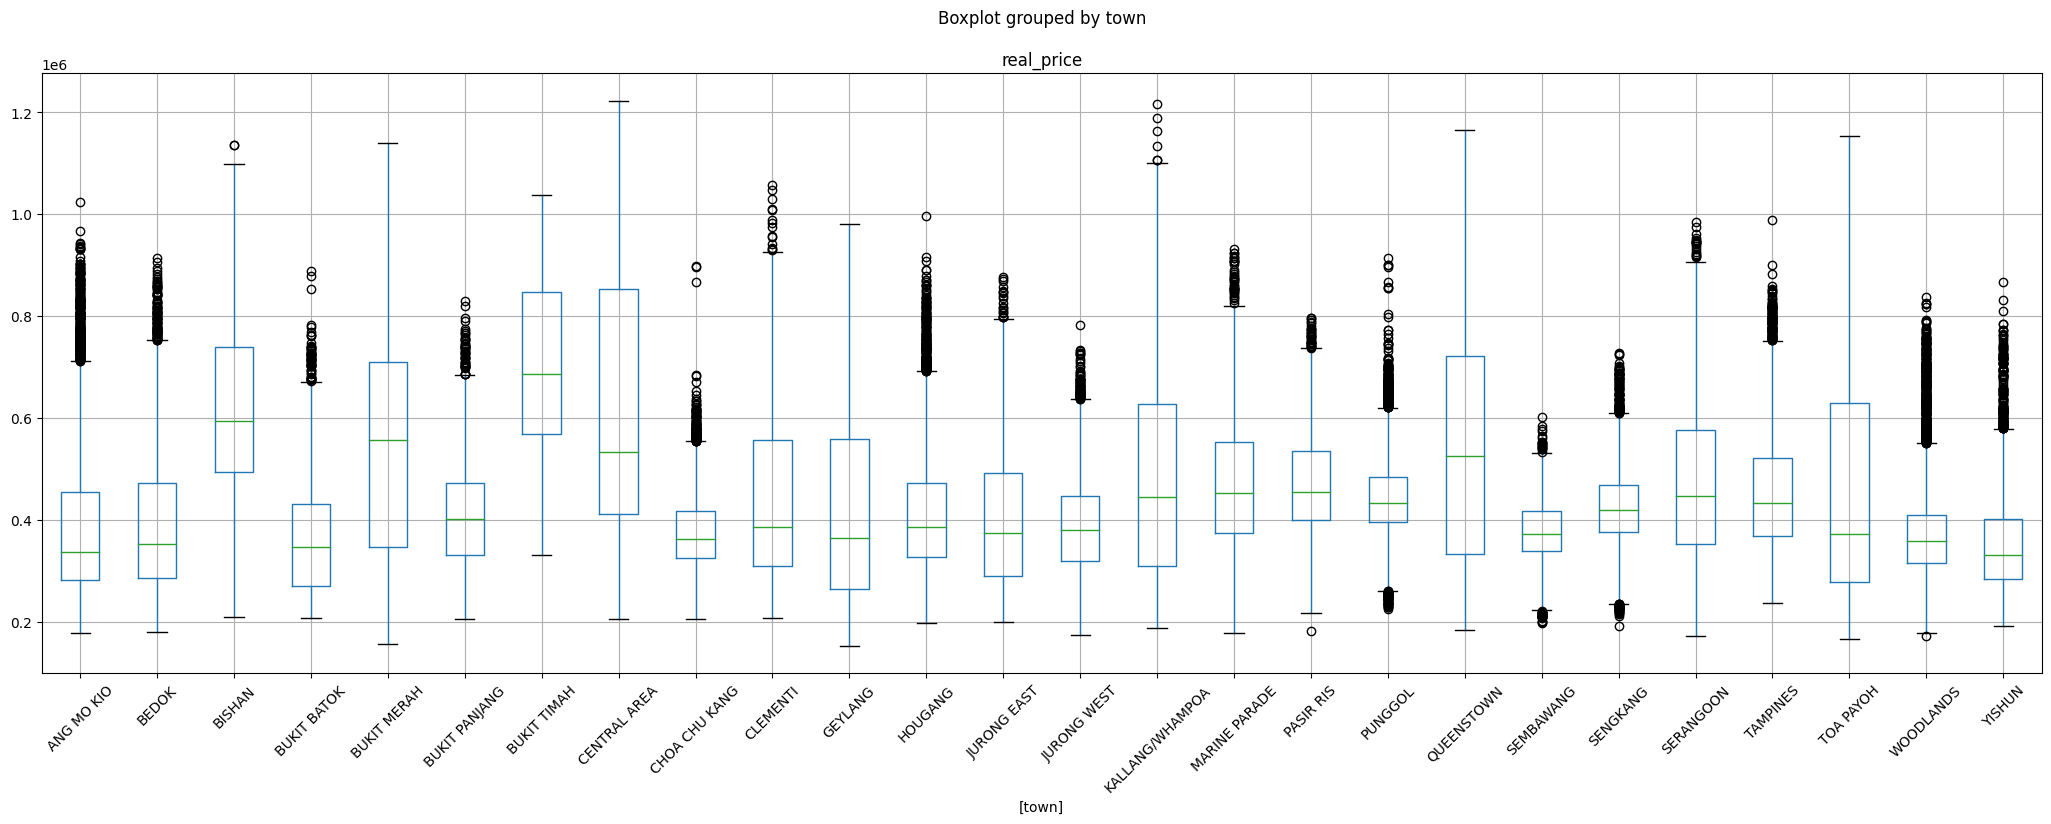

In [21]:
train_df_EDA[["town","real_price"]].boxplot(by=["town"], figsize=(25,8), rot=45)

In [22]:
fig = plt.figure(figsize=(25,8))
ax = sns.boxplot(y=train_df_EDA["real_price"], x=train_df_EDA["town"], order=train_df_EDA["town"])
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels,rotation=45)
fig.show()

KeyboardInterrupt: 

<Figure size 2500x800 with 0 Axes>

C:\Users\angus\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


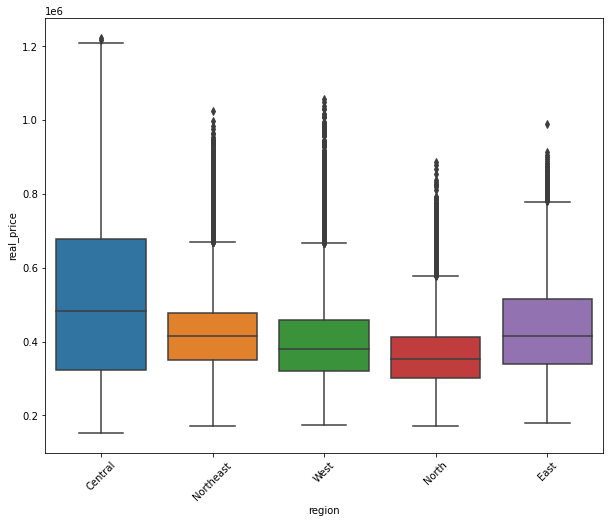

In [14]:
regions={"North":["WOODLANDS","SEMBAWANG","YISHUN","BUKIT BATOK"],
         "Northeast":["HOUGANG","SENGKANG","PUNGGOL","ANG MO KIO","SERANGOON"],
         "Central":["BUKIT MERAH","CENTRAL AREA","BISHAN","GEYLANG","KALLANG/WHAMPOA","QUEENSTOWN","TOA PAYOH","MARINE PARADE"],
         "West":["JURONG WEST","JURONG EAST","CLEMENTI","BUKIT PANJANG","BUKIT TIMAH","CHOA CHU KANG","LIM CHU KANG"],
         "East":["PASIR RIS","TAMPINES","BEDOK"]}

towns = {}

for region in regions:
    for town in regions[region]:
        towns[town] = region
        
train_df_EDA["region"] = train_df_EDA["town"].map(towns)


fig = plt.figure(figsize=(10,8))
ax = sns.boxplot(y=train_df_EDA["real_price"], x=train_df_EDA["region"])
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels,rotation=45)
fig.show()



## Flat Type

In [15]:
train_df_EDA["flat_type"] = train_df_EDA["flat_type"].str.replace('MULTI-GENERATION', 'MULTI GENERATION')
train_df_EDA["flat_type"].value_counts()

4 ROOM              38833
3 ROOM              23677
5 ROOM              22830
EXECUTIVE            7345
2 ROOM               1265
1 ROOM                 40
MULTI GENERATION       31
Name: flat_type, dtype: int64

## Flat Model

In [16]:
train_df_EDA["flat_model"] = train_df_EDA["flat_model"].apply(lambda x: x.upper())
train_df_EDA["flat_model"].value_counts()

MODEL A                   30017
IMPROVED                  23616
NEW GENERATION            13906
PREMIUM APARTMENT          9729
SIMPLIFIED                 4231
APARTMENT                  3741
STANDARD                   2736
MAISONETTE                 2686
MODEL A2                   1306
DBSS                       1252
TYPE S1                     223
ADJOINED FLAT               163
MODEL A-MAISONETTE          162
TYPE S2                     113
TERRACE                      56
MULTI GENERATION             31
PREMIUM APARTMENT LOFT       28
IMPROVED-MAISONETTE          15
PREMIUM MAISONETTE            8
2-ROOM                        2
Name: flat_model, dtype: int64

In [17]:
flat_model_replace = {"PREMIUM MAISONETTE":"MAISONETTE","IMPROVED-MAISONETTE":"MAISONETTE","MODEL A-MAISONETTE":"MAISONETTE",
                      "PREMIUM APARTMENT LOFT":"APARTMENT","TERRACE":"SPECIAL","ADJOINED FLAT":"SPECIAL", "TYPE S1":"SPECIAL",
                      "TYPE S2":"SPECIAL","DBSS":"SPECIAL","MODEL A2":"MODEL A","PREMIUM APARTMENT":"APARTMENT","IMPROVED":"STANDARD",
                      "SIMPLIFIED":"MODEL A","2-ROOM":"STANDARD"}
train_df_EDA["flat_model_replaced"] = train_df_EDA["flat_model"].replace(flat_model_replace)
train_df_EDA["flat_model_replaced"].value_counts()


MODEL A             35554
STANDARD            26354
NEW GENERATION      13906
APARTMENT           13498
MAISONETTE           2871
SPECIAL              1807
MULTI GENERATION       31
Name: flat_model_replaced, dtype: int64

## Storey range

<AxesSubplot:xlabel='storey_range', ylabel='real_price'>

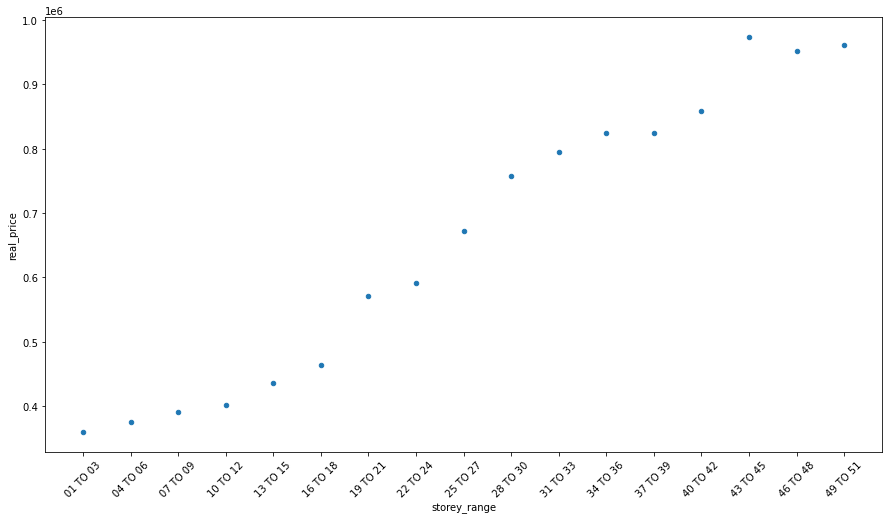

In [18]:
train_df_EDA["storey_range"].unique()
floor_price = pd.DataFrame(train_df_EDA.groupby(by=["storey_range"]).median()["real_price"])
floor_price = floor_price.reset_index(drop=False)
floor_price.plot(kind="scatter", x="storey_range",y="real_price", figsize=(15,8), rot=45)


## Floor area

<AxesSubplot: xlabel='floor_area_sqm', ylabel='real_price'>

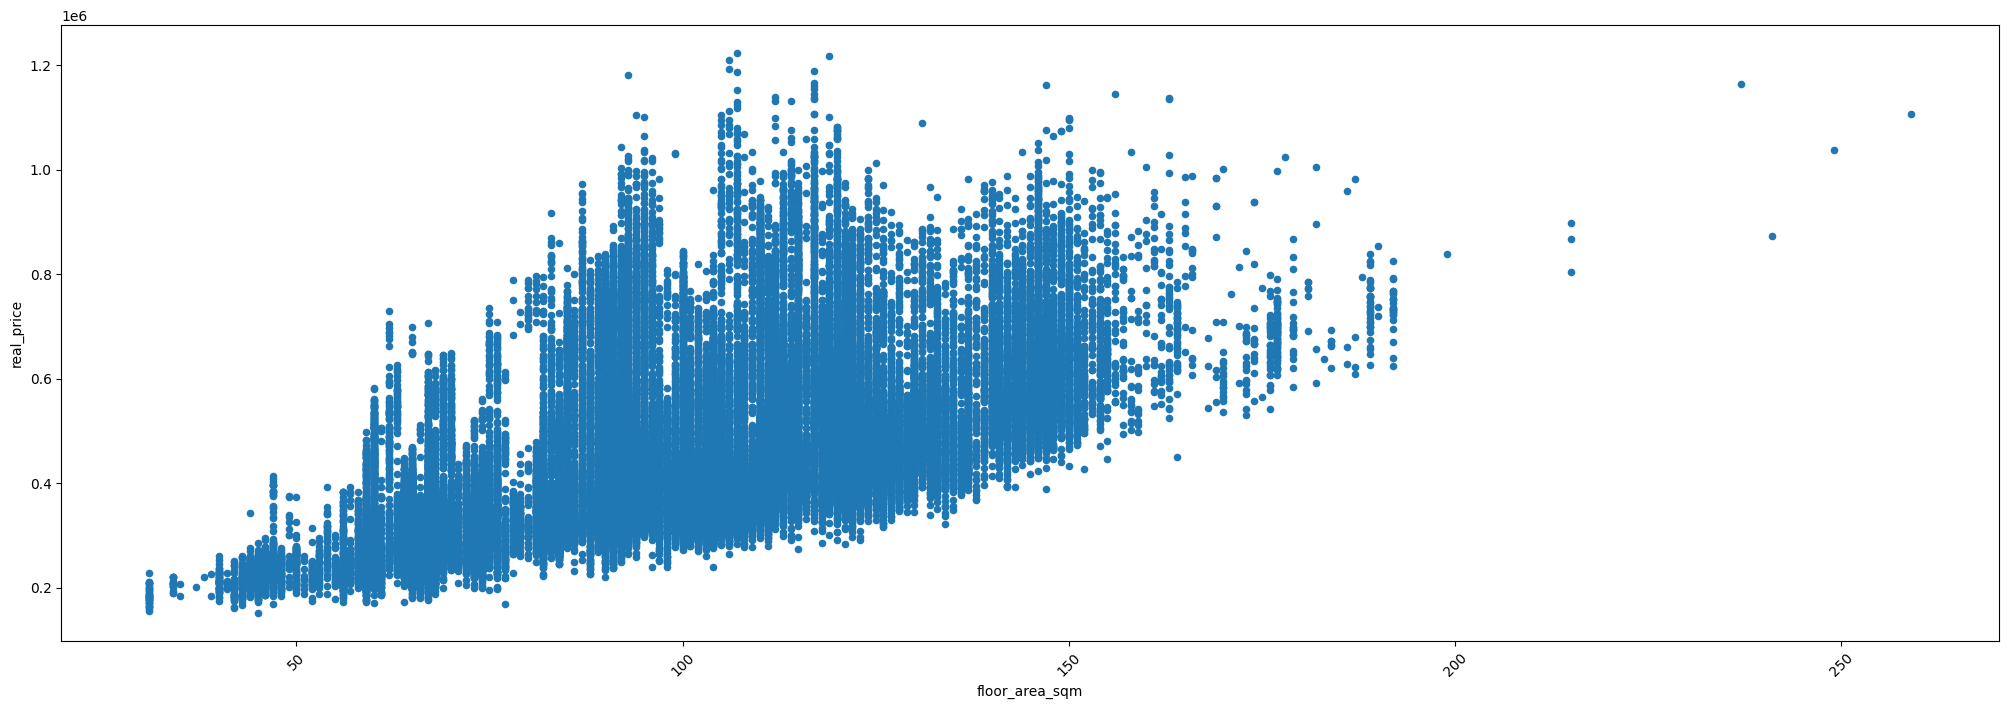

In [23]:
train_df_EDA.plot(kind="scatter", x="floor_area_sqm",y="real_price", figsize=(25,8), rot=45)

<AxesSubplot: xlabel='floor_area_sqm', ylabel='real_price'>

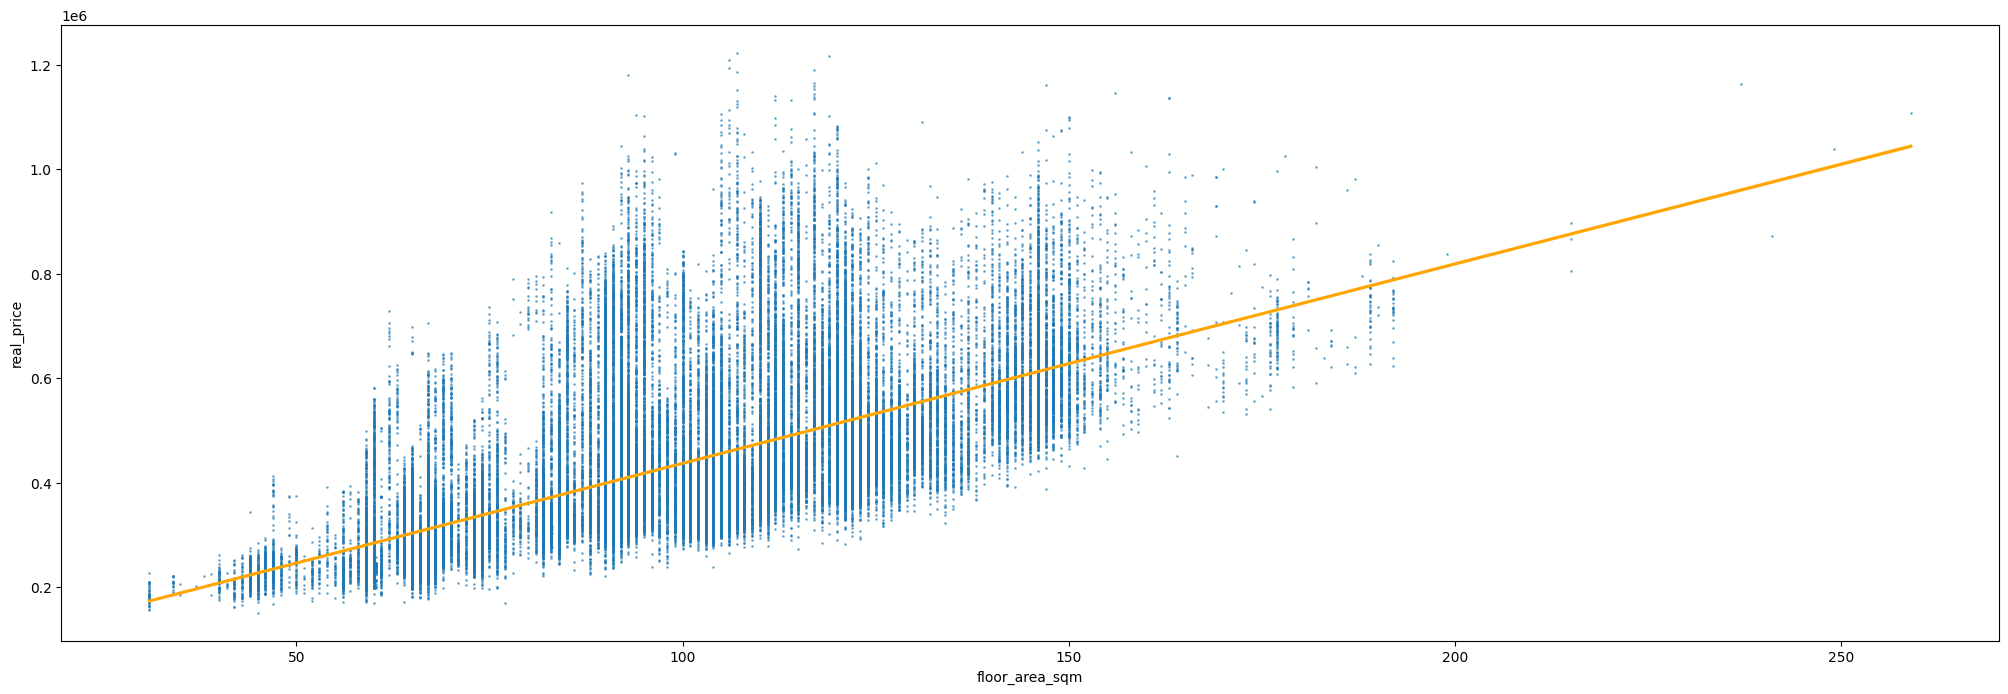

In [24]:
fig = plt.figure(figsize=(25,8))
sns.regplot(x='floor_area_sqm', y='real_price', data=train_df_EDA, scatter_kws={"s": 1, 'alpha':0.5}, line_kws={"color": "orange"})


<AxesSubplot: xlabel='floor_area_sqm', ylabel='real_price'>

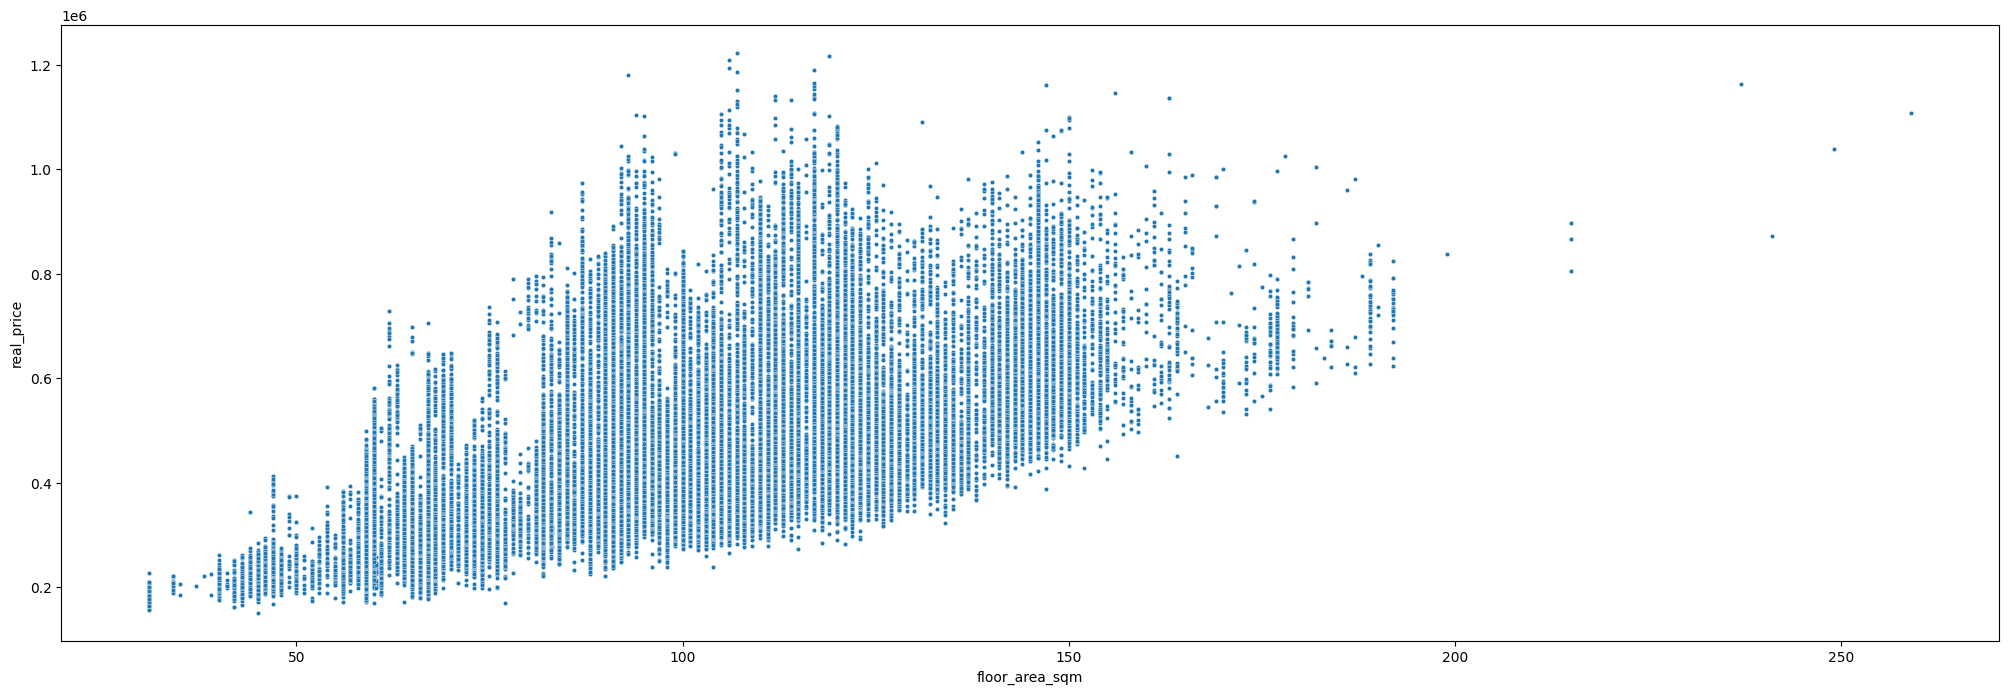

In [25]:
fig = plt.figure(figsize=(25,8))
sns.scatterplot(x='floor_area_sqm', y='real_price', data=train_df_EDA, s=10)

In [26]:
from scipy.stats import pearsonr
pearson_r_pvalue = pearsonr(train_df_EDA['floor_area_sqm'], train_df_EDA["real_price"])
pearson_r_pvalue

PearsonRResult(statistic=0.6346259418906545, pvalue=0.0)

## Lease Commence Date/Lease Age

<AxesSubplot:xlabel='lease_commence_date', ylabel='real_price'>

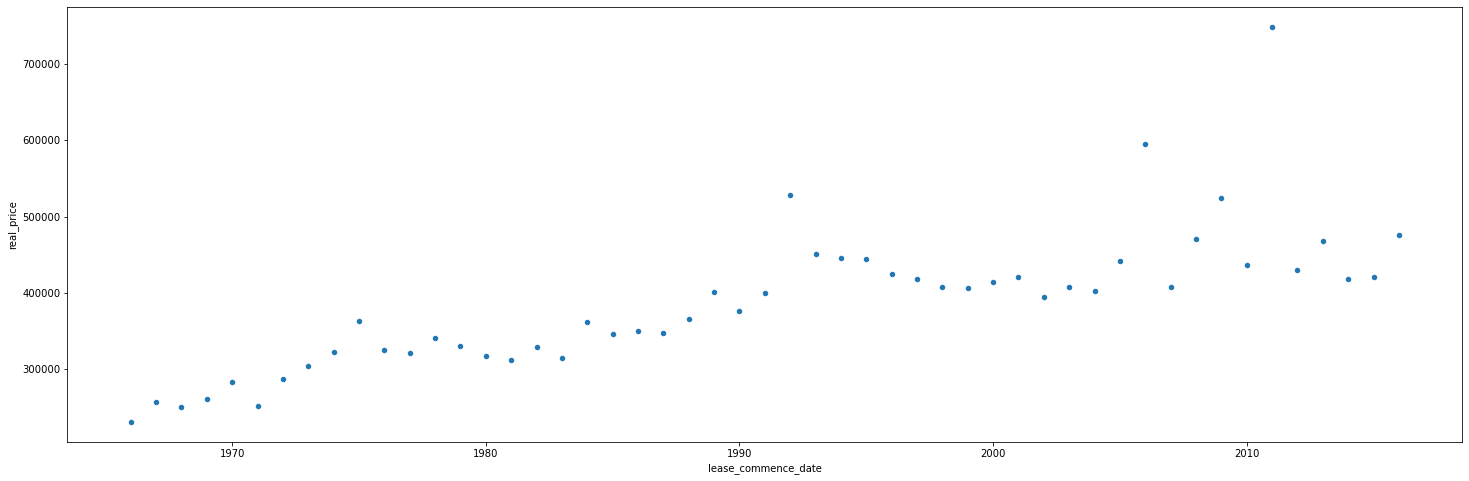

In [21]:
tmp = train_df_EDA[train_df_EDA['year'].isin([2015,2016,2017,2018,2019])]
median_by_lease_commence = pd.DataFrame(tmp.groupby(by=["lease_commence_date"]).median()["real_price"]).sort_index()
median_by_lease_commence = median_by_lease_commence.reset_index(drop=False)
median_by_lease_commence.plot(kind="scatter",x="lease_commence_date",y="real_price",figsize=(25,8))

<AxesSubplot:xlabel='real_price', ylabel='lease_commence_date'>

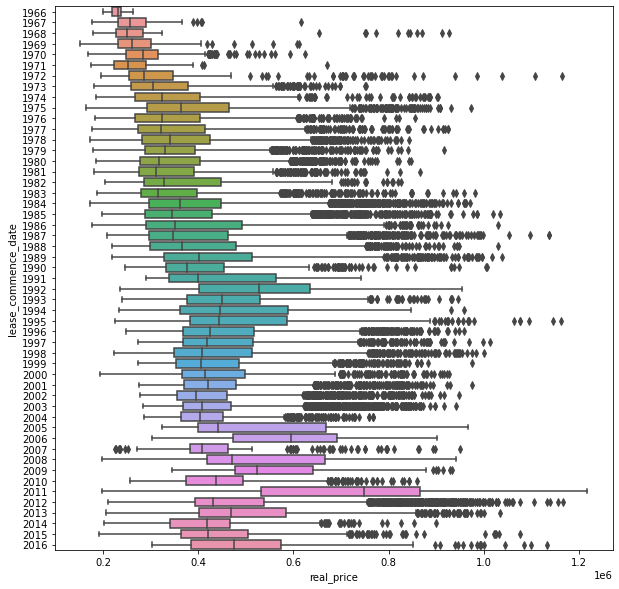

In [22]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(y="lease_commence_date",x="real_price", data=train_df_EDA[train_df_EDA["year"].isin([2013,2014,2015,2016,2017,2018,2019])], orient="h")



C:\Users\angus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


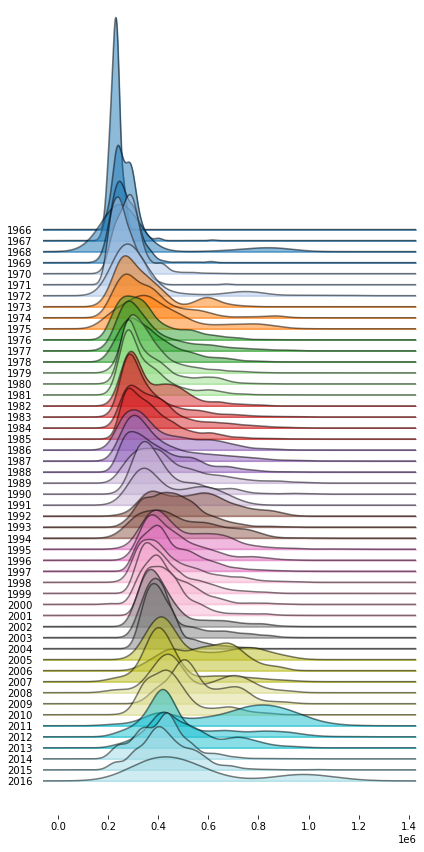

In [23]:
tmp = train_df_EDA[train_df_EDA['year'].isin([2015,2016,2017,2018,2019])]
fig, axes = joypy.joyplot(tmp, by="lease_commence_date", column="real_price", figsize=(6,12), overlap=5, alpha=0.5,colormap=plt.cm.get_cmap('tab20',16))
fig.show()



<AxesSubplot:xlabel='lease_age', ylabel='real_price'>

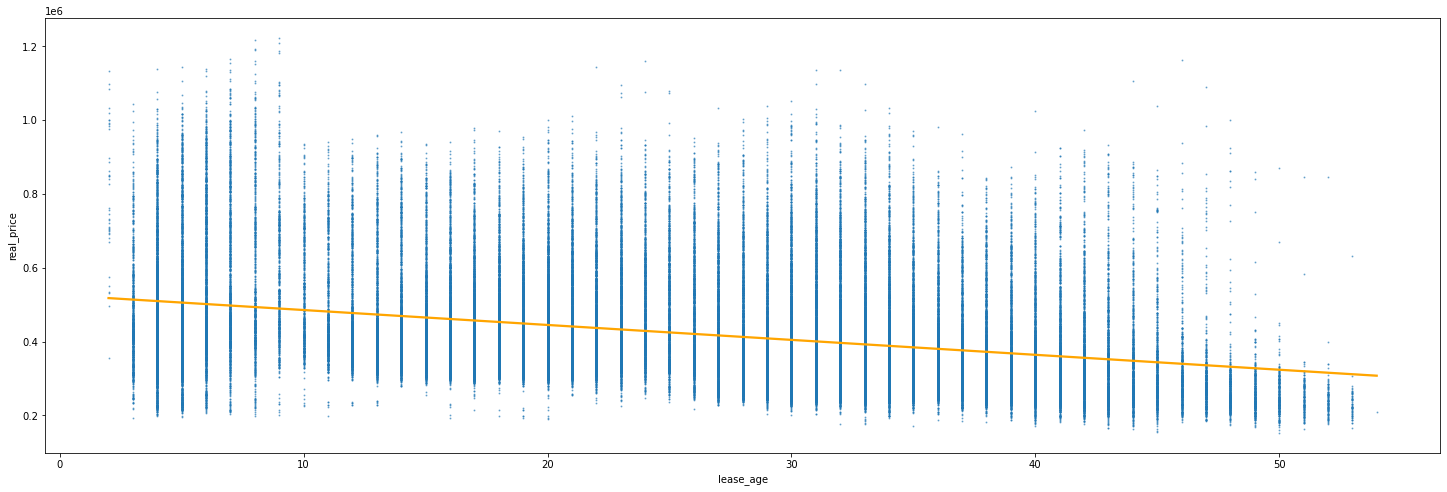

In [24]:
train_df_EDA["lease_age"] = train_df_EDA["year"] - train_df_EDA["lease_commence_date"]

fig = plt.figure(figsize=(25,8))
sns.regplot(x='lease_age', y='real_price', data=train_df_EDA, scatter_kws={"s": 1, 'alpha':0.5}, line_kws={"color": "orange"})


## Getting flat coordinates

In [25]:
def find_postal(lst, filename):
    '''With the block number and street name, get the full address of the hdb flat,
    including the postal code, geogaphical coordinates (lat/long)'''
    
    for index in tqdm(list(range(len(lst)))):
        add = lst[index]        
        # Do not need to change the URL
        url= "https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal="+ add        
        
        # Retrieve information from website
        response = requests.get(url)
        try:
            data = json.loads(response.text) 
        except ValueError:
            print('JSONDecodeError')
            pass
        
        if len(data["results"]) != 0:
            
            temp_df = pd.DataFrame([data["results"][0]])
            # The "add" is the address that was used to search in the website
            temp_df["address"] = add
        
            # Create the file with the first row that is read in 
            if index == 0:
                file = temp_df
            else:
                file = file.append(temp_df)
    file.to_csv(filename + '.csv', index=False)

In [26]:
train_df_EDA['address'] = train_df_EDA['block'] + ' ' + train_df_EDA['street_name']
unique_address = list(set(train_df_EDA['address']))

print('Unique addresses:', len(unique_address))

Unique addresses: 8919


In [27]:
#find_postal(unique_address, './data/flat_coordinates')

In [28]:
flat_coordinates = pd.read_csv('./src/data/flat_coordinates.csv')
flat_coordinates = flat_coordinates[["address","LATITUDE","LONGITUDE"]]
flat_coordinates.head(10)

,address,LATITUDE,LONGITUDE
0,778 YISHUN AVE 2,1.422208,103.833791
1,137 BEDOK NTH AVE 3,1.328831,103.935510
2,179 ANG MO KIO AVE 5,1.376904,103.836218
3,357 YUNG AN RD,1.336829,103.721118
4,311B ANCHORVALE LANE,1.391252,103.884325
5,334 KANG CHING RD,1.339404,103.722907
6,446 CHOA CHU KANG AVE 4,1.380713,103.736891
7,781 PASIR RIS ST 71,1.373863,103.938575
8,244 PASIR RIS ST 21,1.371455,103.963383
9,644 JURONG WEST ST 61,1.339592,103.696358


## Getting school coordinates

### Primary schools

In [29]:
prisch="https://en.wikipedia.org/wiki/List_of_primary_schools_in_Singapore"
response=requests.get(prisch)
print(response.status_code)
soup = BeautifulSoup(response.text, 'html.parser')
prischooltable=soup.find('table',{'class':"wikitable"})
prischooldf=pd.read_html(str(prischooltable))
prischooldf=pd.DataFrame(prischooldf[0])
prischooldf = prischooldf[["Name"]]
prischooldf.head(10)

200


,Name
0,Admiralty Primary School
1,Ahmad Ibrahim Primary School
2,Ai Tong School
3,Alexandra Primary School
4,Anchor Green Primary School
5,Anderson Primary School
6,Anglo-Chinese School (Junior)
7,Anglo-Chinese School (Primary)
8,Angsana Primary School
9,Ang Mo Kio Primary School


### Secondary schools

In [30]:
secsch="https://en.wikipedia.org/wiki/List_of_secondary_schools_in_Singapore"
response=requests.get(secsch)
print(response.status_code)
soup = BeautifulSoup(response.text, 'html.parser')
secschooltable=soup.find('table',{'class':"wikitable"})
secschooldf=pd.read_html(str(secschooltable))
secschooldf=pd.DataFrame(secschooldf[0])
secschooldf = secschooldf[["Name"]]
secschooldf.head(10)

200


,Name
0,Admiralty Secondary School
1,Ahmad Ibrahim Secondary School
2,Anderson Secondary School
3,Anglican High School
4,Anglo-Chinese School (Barker Road)
5,Anglo-Chinese School (Independent)
6,Ang Mo Kio Secondary School
7,Assumption English School
8,Bartley Secondary School
9,Beatty Secondary School


### Junior Colleges

In [31]:
jcsch="https://en.wikipedia.org/wiki/List_of_schools_in_Singapore"
response=requests.get(jcsch)
print(response.status_code)
soup = BeautifulSoup(response.text, 'html.parser')
polyjcschooltable=soup.find_all('table',{'class':"wikitable"})
polyjcschooldf=pd.read_html(str(polyjcschooltable))
jcschooldf = pd.DataFrame(polyjcschooldf[0])
jcschooldf = jcschooldf["College name"][["English"]]
jcschooldf = jcschooldf.rename(columns={"English":"Name"})
jcschooldf

200


,Name
0,Anderson Serangoon Junior College
1,Anglo-Chinese Junior College
2,Anglo-Chinese IB Junior College
3,Catholic Junior College
4,Dunman High School
5,Eunoia Junior College
6,Hwa Chong Institution
7,Jurong Pioneer Junior College
8,Nanyang Junior College
9,National Junior College


### Polytechnics

In [32]:
polyschooldf = pd.DataFrame(polyjcschooldf[1])
polyschooldf = polyschooldf["Polytechnic"][["Full name"]]
polyschooldf = polyschooldf.rename(columns={"Full name":"Name"})
polyschooldf["Name"] = polyschooldf["Name"].apply(lambda x: x.split("Polytechnic")[0] + "Polytechnic")
polyschooldf

,Name
0,Singapore Polytechnic
1,Ngee Ann Polytechnic
2,Temasek Polytechnic
3,Nanyang Polytechnic
4,Republic Polytechnic


### Universities

In [33]:
unisch=[{"Name":"National University of Singapore"},
       {"Name":"Nanyang Technological University"},
       {"Name":"Singapore Management University"},
       {"Name":"Singapore University of Technology and Design"},
       {"Name":"Singapore Institute of Technology"},
       {"Name":"Singapore University of Social Sciences"}]
unischooldf = pd.DataFrame(unisch)
unischooldf

,Name
0,National University of Singapore
1,Nanyang Technological University
2,Singapore Management University
3,Singapore University of Technology and Design
4,Singapore Institute of Technology
5,Singapore University of Social Sciences


In [34]:
school_df = pd.concat([prischooldf,secschooldf,jcschooldf,polyschooldf,unischooldf])
school_df = school_df.reset_index(drop=True)
unique_schools = list(set(school_df["Name"]))
print(len(unique_schools))

359


In [35]:
#find_postal(unique_schools, './src/data/school_coordinates')

In [36]:
school_coordinates = pd.read_csv('./src/data/school_coordinates.csv')
school_coordinates = school_coordinates[["address","LATITUDE","LONGITUDE"]]
school_coordinates.head(10)


,address,LATITUDE,LONGITUDE
0,CHIJ St. Joseph's Convent,1.391752,103.902465
1,Woodlands Ring Secondary School,1.436489,103.800148
2,River Valley Primary School,1.294223,103.835815
3,Compassvale Primary School,1.394445,103.897812
4,Westwood Secondary School,1.353737,103.701772
5,Punggol Cove Primary School,1.411599,103.898804
6,Poi Ching School,1.357651,103.935246
7,Nanyang Primary School,1.321115,103.806468
8,Cantonment Primary School,1.275473,103.839963
9,Paya Lebar Methodist Girls' School (Secondary),1.350968,103.885120


In [37]:
def find_nearest(house, amenity, radius=2):
    """
    this function finds the nearest locations from the 2nd table from the 1st address
    Both are dataframes with a specific format:
        1st column: any string column ie addresses taken from the "find_postal_address.py"
        2nd column: latitude (float)
        3rd column: longitude (float)
    Column name doesn't matter.
    It also finds the number of amenities within the given radius (default=2)
    """
    results = {}
    # first column must be address
    for index in tqdm(list(range(len(house)))):
        
        flat = house.iloc[index,0]
        # 2nd column must be latitude, 3rd column must be longitude
        flat_loc = (house.iloc[index,1],house.iloc[index,2])
        flat_amenity = ['','',100,0]
        for ind, eachloc in enumerate(amenity.iloc[:,0]):
            amenity_loc = (amenity.iloc[ind,1],amenity.iloc[ind,2])
            distance = geodesic(flat_loc,amenity_loc)
            distance = float(str(distance)[:-3]) # convert to float

            if distance <= radius:   # compute number of amenities in 2km radius
                flat_amenity[3] += 1

            if distance < flat_amenity[2]: # find nearest amenity
                flat_amenity[0] = flat
                flat_amenity[1] = eachloc
                flat_amenity[2] = distance

        results[flat] = flat_amenity
    return results

In [38]:
#nearest_school = find_nearest(flat_coordinates, school_coordinates)

In [39]:
#nearest_school_df = pd.DataFrame(nearest_school).transpose()
#nearest_school_df.columns = ["address","nearest_school","distance_to_nearest_school","# of schools within radius"]
#nearest_school_df = nearest_school_df.sort_values(by=["# of schools within radius"], ascending = False)
#nearest_school_df = nearest_school_df.reset_index(drop = True)
#nearest_school_df.tail(10)
#nearest_school_df.to_csv("./src/data/nearest_schools.csv", index=False)
nearest_school_df = pd.read_csv("./src/data/nearest_schools.csv")
nearest_school_df

,address,nearest_school,distance_to_nearest_school,# of schools within radius
0,223D COMPASSVALE WALK,Seng Kang Primary School,0.271095,31
1,303C ANCHORVALE LINK,Nan Chiau High School,0.134618,30
2,273B COMPASSVALE LINK,North Vista Primary School,0.218274,30
3,128 RIVERVALE ST,CHIJ St. Joseph's Convent,0.141715,30
4,200A SENGKANG EAST RD,Nan Chiau High School,0.294478,30
...,...,...,...,...
8914,52 KENT RD,National University of Singapore,1.749614,1
8915,2 BEACH RD,Pasir Ris Primary School,2.430759,0
8916,4 CHANGI VILLAGE RD,Pasir Ris Primary School,3.305993,0
8917,1 CHANGI VILLAGE RD,Pasir Ris Primary School,3.304416,0


<AxesSubplot:xlabel='# of schools within radius', ylabel='real_price'>

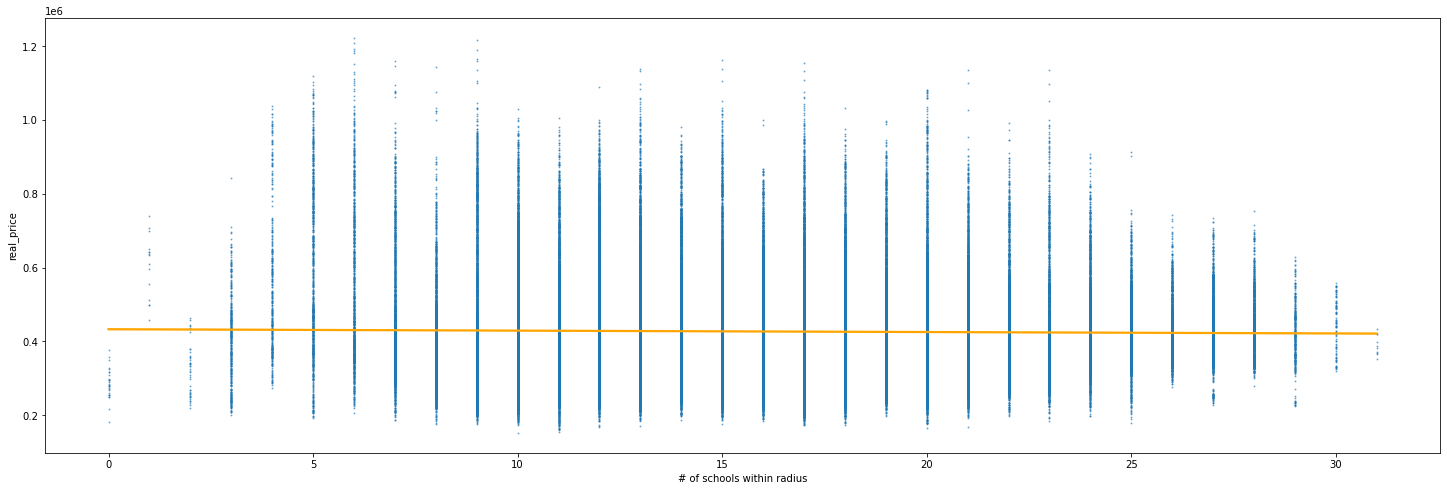

In [40]:
train_df_EDA = pd.merge(train_df_EDA, nearest_school_df, how="left", on=["address"])

fig = plt.figure(figsize=(25,8))
sns.regplot(x='# of schools within radius', y='real_price', data=train_df_EDA, scatter_kws={"s": 1, 'alpha':0.5}, line_kws={"color": "orange"})


<AxesSubplot:xlabel='distance_to_nearest_school', ylabel='real_price'>

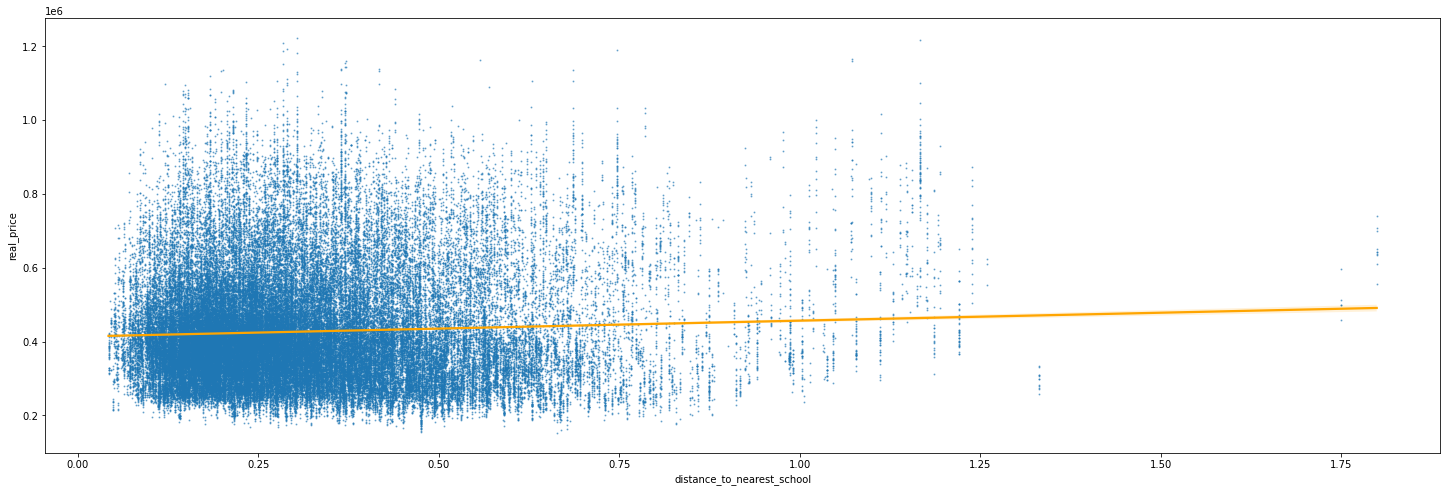

In [41]:
fig = plt.figure(figsize=(25,8))
sns.regplot(x='distance_to_nearest_school', y='real_price', data=train_df_EDA[train_df_EDA['distance_to_nearest_school'] <= 2],
            scatter_kws={"s": 1, 'alpha':0.5}, line_kws={"color": "orange"})


### MRT Stations

In [42]:
mrt_stations="https://en.wikipedia.org/wiki/List_of_Singapore_MRT_stations"
response=requests.get(mrt_stations)
print(response.status_code)
soup = BeautifulSoup(response.text, 'html.parser')
mrt_stations_table=soup.find_all('table',{'class':"wikitable"})
mrt_stations_table=pd.read_html(str(mrt_stations_table))
mrt_stations_table = pd.DataFrame(mrt_stations_table[2])

200


In [43]:
mrt_stations_df = pd.concat([mrt_stations_table["Station name"][["English • Malay"]], mrt_stations_table["Opening"]], axis = "columns")
mrt_stations_df.columns = ["Name","Opening date"]
mrt_stations_df = mrt_stations_df[mrt_stations_df["Name"] != mrt_stations_df["Opening date"]]
mrt_stations_df["Name"] = mrt_stations_df["Name"].apply(lambda x: x.replace(' • Kebun Bunga',''))
mrt_stations_df["Name"] = mrt_stations_df["Name"].apply(lambda x: x.upper() + " MRT STATION")
mrt_stations_df = mrt_stations_df[mrt_stations_df["Opening date"].apply(lambda x: len(x) >= 10)]
mrt_stations_df["Opening date"] = mrt_stations_df["Opening date"].apply(lambda x: x.replace('[19]',''))
mrt_stations_df["Opening month"] = mrt_stations_df["Opening date"].apply(lambda x: x.split(" ")[1][0:3]).map(months)
mrt_stations_df["Opening month"] = mrt_stations_df["Opening month"].astype(int)
mrt_stations_df["Opening year"] = mrt_stations_df["Opening date"].apply(lambda x: x.split(" ")[2])
mrt_stations_df["Opening year"] = mrt_stations_df["Opening year"].astype(int)
mrt_stations_df = mrt_stations_df.sort_values(by=["Opening year","Opening month"], ascending = [True,True])
mrt_stations_df = mrt_stations_df.drop_duplicates(subset="Name", keep="first")
mrt_stations_df = mrt_stations_df.reset_index(drop = True)
mrt_stations_df = mrt_stations_df[["Name","Opening year","Opening month"]]

unique_stations = list(set(mrt_stations_df["Name"]))


In [44]:
#find_postal(unique_stations, './src/data/mrt_station_coordinates')

In [45]:
mrt_station_coordinates = pd.read_csv('./src/data/mrt_station_coordinates.csv')
mrt_station_coordinates = mrt_station_coordinates.rename(columns={"address":"Name"})
mrt_station_coordinates = mrt_station_coordinates[["Name","LATITUDE","LONGITUDE"]]
mrt_station_coordinates = pd.merge(mrt_station_coordinates, mrt_stations_df, how="left",on="Name")
mrt_station_coordinates.head(10)
mrt_station_coordinates.to_csv("./src/data/mrt_station_coordinates_w_period.csv",index=False)

In [46]:
def find_nearest_mrt(house, stations, radius=2):
    """
    this function finds the nearest locations from the 2nd table from the 1st address
    Both are dataframes with a specific format:
        1st column: any string column ie addresses taken from the "find_postal_address.py"
        2nd column: latitude (float)
        3rd column: longitude (float)
    Column name doesn't matter.
    It also finds the number of operating stations within the given radius (default=2)
    It takes into account the time at which the transaction of the flat occurred for counting the number of operating stations
    """
    results = {}
    # first column must be address
    for index in tqdm(list(range(len(house)))):
        
        flat = house.iloc[index,0]
        # 2nd column must be latitude, 3rd column must be longitude
        flat_loc = (house.iloc[index,1],house.iloc[index,2])
        flat_year = house.iloc[index,3]
        flat_month = house.iloc[index,4]
        flat_year_month = datetime.datetime(flat_year, flat_month, 1)

        flat_station = ['',100,0]
        for ind, station in enumerate(stations.iloc[:,0]):
            station_loc = (stations.iloc[ind,1],stations.iloc[ind,2])
            station_year_month = datetime.datetime(stations.iloc[ind,3], stations.iloc[ind,4], 1)

            if flat_year_month >= station_year_month:
            
                distance = geodesic(flat_loc,station_loc)
                distance = float(str(distance)[:-3]) # convert to float

                if distance <= radius:   # compute number of stations in 2km radius
                    flat_station[2] += 1

                if distance < flat_station[1]: # find nearest station
                    flat_station[0] = station
                    flat_station[1] = distance
                    
        results[flat,flat_year,flat_month] = flat_station
    return results

In [47]:
train_df_EDA["address"] = train_df_EDA["block"] + " " + train_df_EDA["street_name"]
flat_w_period = train_df_EDA[["address","year","month"]]
flat_coordinates_w_period = pd.merge(flat_w_period,flat_coordinates, how="left",on="address")
flat_coordinates_w_period = flat_coordinates_w_period[["address","LATITUDE","LONGITUDE","year","month"]]
flat_coordinates_w_period = flat_coordinates_w_period[~flat_coordinates_w_period["LATITUDE"].isna()]
flat_coordinates_w_period = flat_coordinates_w_period.reset_index(drop = True)
flat_coordinates_w_period.head(10)
len(flat_coordinates_w_period)

94021

In [48]:
#nearest_mrt = find_nearest_mrt(flat_coordinates_w_period, mrt_station_coordinates)

In [49]:
#nearest_mrt_df = pd.DataFrame(nearest_mrt).transpose()
#nearest_mrt_df = nearest_mrt_df.reset_index(drop = False)
#nearest_mrt_df.columns = ["address","year","month","nearest_mrt_station","distance_to_nearest_MRT","# of stations within radius"]
#nearest_mrt_df = nearest_mrt_df.sort_values(by=["# of stations within radius"], ascending = False)
#nearest_mrt_df = nearest_mrt_df.reset_index(drop = True)
#nearest_mrt_df.tail(10)
#nearest_mrt_df.to_csv("./src/data/nearest_mrt_stations.csv", index=False)
nearest_mrt_df = pd.read_csv("./src/data/nearest_mrt_stations.csv")
nearest_mrt_df

,address,year,month,nearest_mrt_station,distance_to_nearest_MRT,# of stations within radius
0,233 BAIN ST,2020,9,BRAS BASAH MRT STATION,0.360638,21
1,232 BAIN ST,2019,12,BRAS BASAH MRT STATION,0.298280,21
2,232 BAIN ST,2018,4,BRAS BASAH MRT STATION,0.298280,21
3,232 BAIN ST,2018,8,BRAS BASAH MRT STATION,0.298280,21
4,233 BAIN ST,2019,7,BRAS BASAH MRT STATION,0.360638,21
...,...,...,...,...,...,...
82707,29 MARINE CRES,2015,7,KEMBANGAN MRT STATION,2.011360,0
82708,441B FERNVALE RD,2020,9,BUANGKOK MRT STATION,2.249195,0
82709,405C FERNVALE LANE,2017,8,BUANGKOK MRT STATION,2.299626,0
82710,230 PENDING RD,2015,9,BUKIT GOMBAK MRT STATION,2.988376,0


<AxesSubplot:xlabel='# of stations within radius', ylabel='real_price'>

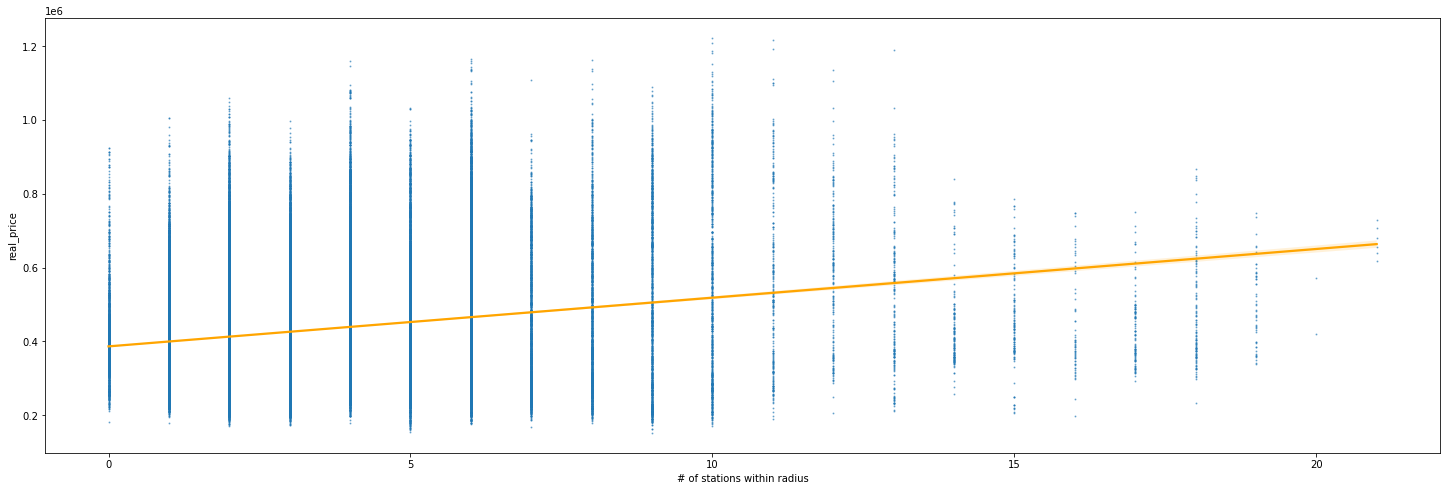

In [50]:
train_df_EDA = pd.merge(train_df_EDA, nearest_mrt_df, how="left", on=["address","year","month"])

fig = plt.figure(figsize=(25,8))
sns.regplot(x='# of stations within radius', y='real_price', data=train_df_EDA, scatter_kws={"s": 1, 'alpha':0.5}, line_kws={"color": "orange"})


<AxesSubplot:xlabel='distance_to_nearest_MRT', ylabel='real_price'>

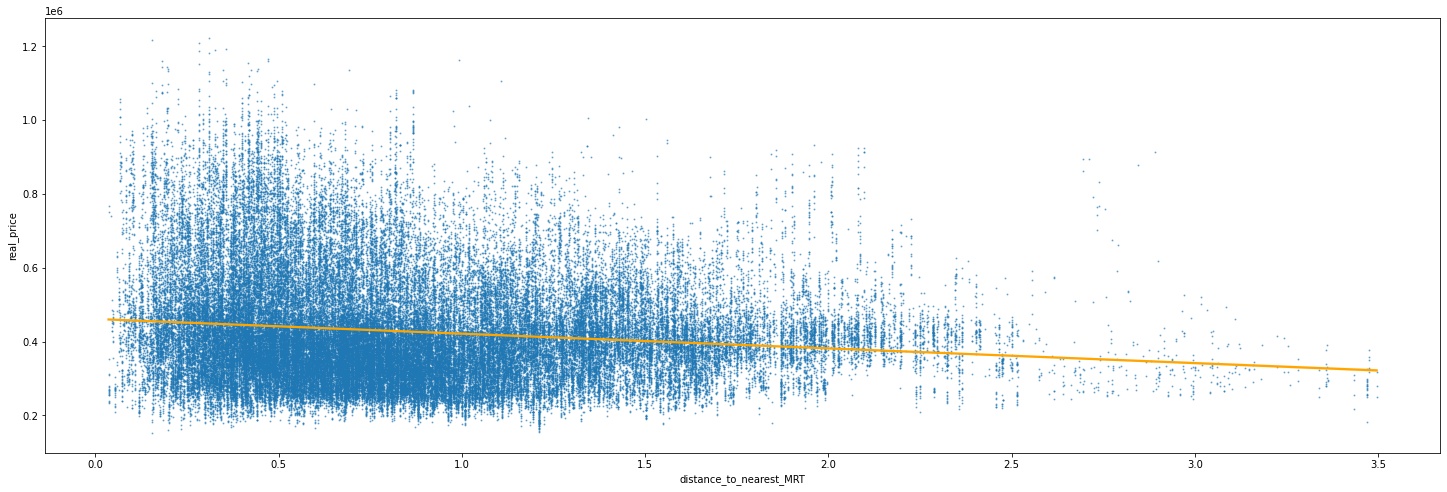

In [51]:

fig = plt.figure(figsize=(25,8))
sns.regplot(x='distance_to_nearest_MRT', y='real_price', data=train_df_EDA, scatter_kws={"s": 1, 'alpha':0.5}, line_kws={"color": "orange"})


### Malls

In [52]:
malls="https://en.wikipedia.org/wiki/List_of_shopping_malls_in_Singapore"
response=requests.get(malls)
print(response.status_code)
soup = BeautifulSoup(response.text, 'html.parser')

200


In [53]:
import re
malls = []
for i in soup.find_all('li'):
    if i.string != None:
        malls.append(i.string)
    else:
        malls.append(i.text)
        
malls_df = pd.DataFrame(malls)
malls_df.columns = ["Name"]
malls_df = malls_df.drop_duplicates().reset_index(drop = True)
#print(malls_df[malls_df["Name"] == "100 AM[1]"])
#print(malls_df[malls_df["Name"] == "Queensway Shopping Centre"])
malls_df = malls_df.iloc[8:173,].reset_index(drop=True)
patt = r'\[(.*?)\]'
malls_df["Name"] = malls_df["Name"].apply(lambda x: x.replace(["[{}]".format(i) for i in re.findall(patt, x)][0],"") if bool(re.search(patt, x)) else x)     
unique_malls = list(set(malls_df["Name"]))


In [54]:
#find_postal(unique_malls, './src/data/mall_coordinates')

In [55]:
mall_coordinates = pd.read_csv('./src/data/mall_coordinates.csv')
mall_coordinates = mall_coordinates.rename(columns={"address":"Name"})
mall_coordinates = mall_coordinates[["Name","LATITUDE","LONGITUDE"]]
mall_coordinates


,Name,LATITUDE,LONGITUDE
0,Millenia Walk,1.292605,103.859725
1,Woodlands North Plaza,1.442753,103.790548
2,Kallang Wave Mall,1.303075,103.873150
3,Midpoint Orchard,1.301788,103.838660
4,Yew Tee Square,1.398369,103.747188
...,...,...,...
151,Parkway Parade,1.301070,103.905279
152,Century Square,1.352368,103.943812
153,Sembawang Shopping Centre,1.441825,103.824845
154,Roxy Square,1.304326,103.904051


In [56]:
#nearest_mall = find_nearest(flat_coordinates, mall_coordinates)

In [57]:
#nearest_mall_df = pd.DataFrame(nearest_mall).transpose()
#nearest_mall_df.columns = ["address","nearest_mall","distance_to_nearest_mall","#_of_malls_within_radius"]
#nearest_mall_df = nearest_mall_df.sort_values(by=["#_of_malls_within_radius"], ascending = False)
#nearest_mall_df = nearest_mall_df.reset_index(drop = True)
#nearest_mall_df.head(10)
#nearest_mall_df.to_csv("./data/nearest_malls.csv", index=False)
nearest_mall_df = pd.read_csv("./src/data/nearest_malls.csv")
nearest_mall_df

,address,nearest_mall,distance_to_nearest_mall,#_of_malls_within_radius
0,663 BUFFALO RD,Tekka Centre,0.061525,37
1,661 BUFFALO RD,Tekka Centre,0.079235,37
2,662 BUFFALO RD,Tekka Centre,0.056044,37
3,8 SELEGIE RD,Sim Lim Square,0.283891,36
4,10 SELEGIE RD,Tekka Centre,0.273122,36
...,...,...,...,...
9024,8 EMPRESS RD,The Star Vista,2.156341,0
9025,113 BEDOK RESERVOIR RD,Djitsun Mall,2.131996,0
9026,1 CHANGI VILLAGE RD,Jewel Changi Airport,3.122043,0
9027,148 BEDOK RESERVOIR RD,Djitsun Mall,2.213088,0


<AxesSubplot:xlabel='#_of_malls_within_radius', ylabel='real_price'>

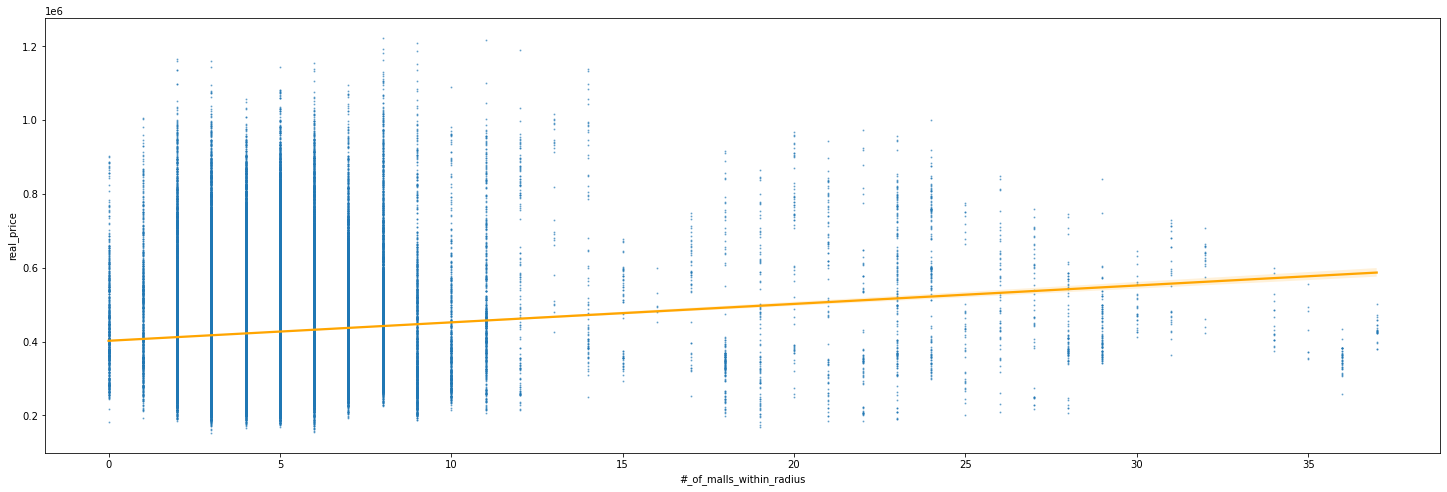

In [58]:
train_df_EDA = pd.merge(train_df_EDA, nearest_mall_df, how="left", on=["address"])

fig = plt.figure(figsize=(25,8))
sns.regplot(x='#_of_malls_within_radius', y='real_price', data=train_df_EDA, scatter_kws={"s": 1, 'alpha':0.5}, line_kws={"color": "orange"})



<AxesSubplot:xlabel='distance_to_nearest_mall', ylabel='real_price'>

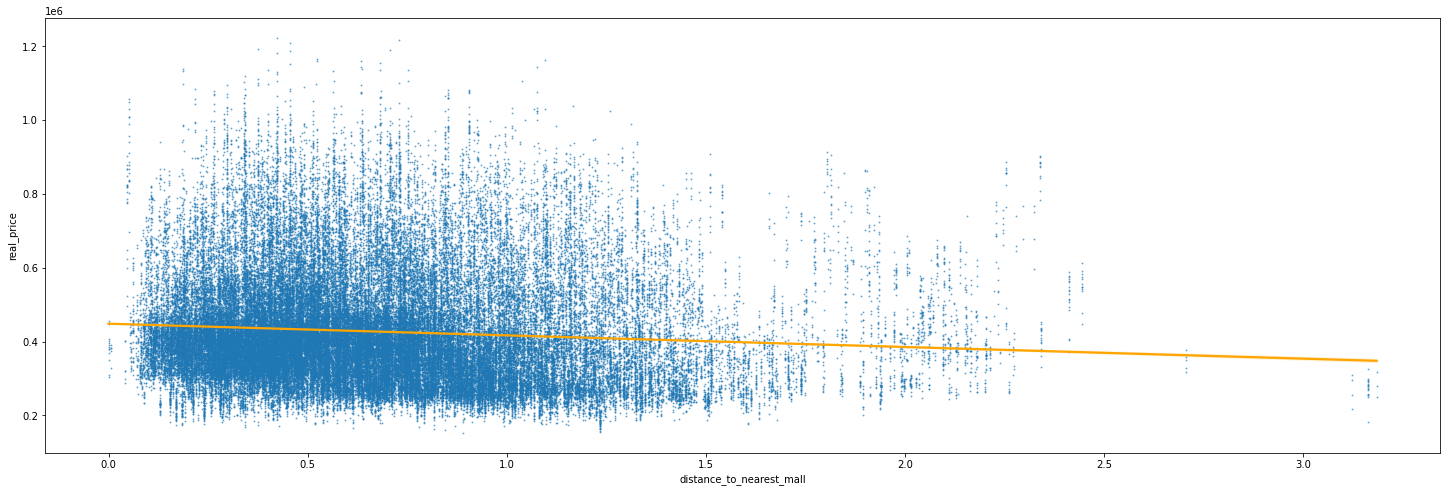

In [59]:
fig = plt.figure(figsize=(25,8))
sns.regplot(x='distance_to_nearest_mall', y='real_price', data=train_df_EDA, scatter_kws={"s": 1, 'alpha':0.5}, line_kws={"color": "orange"})


### Parks

In [60]:
parks="https://en.wikipedia.org/wiki/List_of_parks_in_Singapore"
response=requests.get(parks)
print(response.status_code)
soup = BeautifulSoup(response.text, 'html.parser')
parks_table=soup.find_all('table',{'class':"wikitable"})
parks_table=pd.read_html(str(parks))

200


In [61]:
parks_df = pd.DataFrame(parks_table[2])
unique_parks = sorted(list(set(parks_df["Name"])), reverse=False)
len(unique_parks)

74

In [62]:
#find_postal(unique_parks, './src/data/park_coordinates')

In [63]:
park_coordinates = pd.read_csv('./src/data/park_coordinates.csv')
park_coordinates = park_coordinates.rename(columns={"address":"Name"})
park_coordinates = park_coordinates[["Name","LATITUDE","LONGITUDE"]]
park_coordinates

,Name,LATITUDE,LONGITUDE
0,Admiralty Park,1.449489,103.779119
1,Ang Mo Kio Town Garden East,1.370692,103.850477
2,Ang Mo Kio Town Garden West,1.374168,103.842949
3,Bedok Town Park,1.334399,103.922349
4,Bishan-Ang Mo Kio Park,1.361115,103.847705
...,...,...,...
66,Yishun Neighbourhood Park,1.437742,103.835167
67,Yishun Park,1.424488,103.842483
68,Yishun Pond Park,1.427828,103.840062
69,Youth Olympic Park,1.288953,103.860432


In [64]:
#nearest_park = find_nearest(flat_coordinates, park_coordinates)

In [65]:
#nearest_park_df = pd.DataFrame(nearest_park).transpose()
#nearest_park_df.columns = ["address","nearest_park","distance_to_nearest_park","#_of_parks_within_radius"]
#nearest_park_df = nearest_park_df.sort_values(by=["#_of_parks_within_radius"], ascending = False)
#nearest_park_df = nearest_park_df.reset_index(drop = True)
#nearest_park_df.head(10)
#nearest_park_df.to_csv("./src/data/nearest_parks.csv", index=False)
nearest_park_df = pd.read_csv("./src/data/nearest_parks.csv")
nearest_park_df

,address,nearest_park,distance_to_nearest_park,#_of_parks_within_radius
0,9 JLN KUKOH,Pearl's Hill City Park,0.349613,11
1,8 JLN KUKOH,Pearl's Hill City Park,0.327046,11
2,53 CHIN SWEE RD,Pearl's Hill City Park,0.464404,11
3,535 UPP CROSS ST,Hong Lim Park,0.229552,11
4,536 UPP CROSS ST,Hong Lim Park,0.213924,11
...,...,...,...,...
9024,943 JURONG WEST ST 91,Jurong Central Park,2.110332,0
9025,705 WOODLANDS DR 40,Admiralty Park,2.180163,0
9026,682D WOODLANDS DR 73,Sembawang Park,2.831367,0
9027,646 WOODLANDS RING RD,Admiralty Park,2.708459,0


<AxesSubplot:xlabel='#_of_parks_within_radius', ylabel='real_price'>

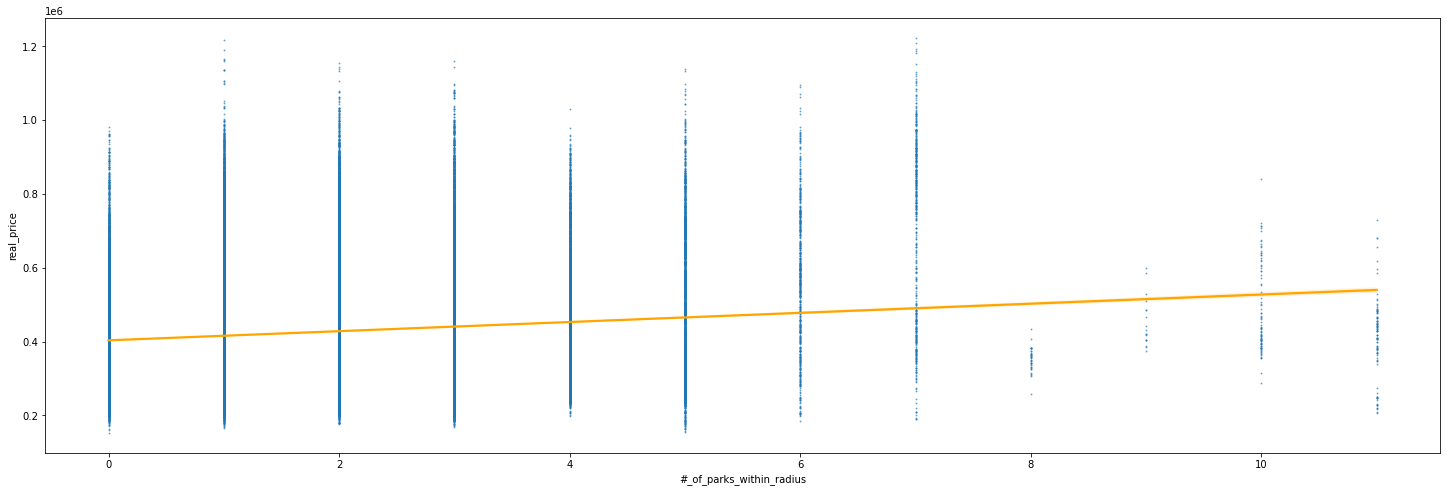

In [66]:
train_df_EDA = pd.merge(train_df_EDA, nearest_park_df, how="left", on=["address"])

fig = plt.figure(figsize=(25,8))
sns.regplot(x='#_of_parks_within_radius', y='real_price', data=train_df_EDA, scatter_kws={"s": 1, 'alpha':0.5}, line_kws={"color": "orange"})



<AxesSubplot:xlabel='distance_to_nearest_park', ylabel='real_price'>

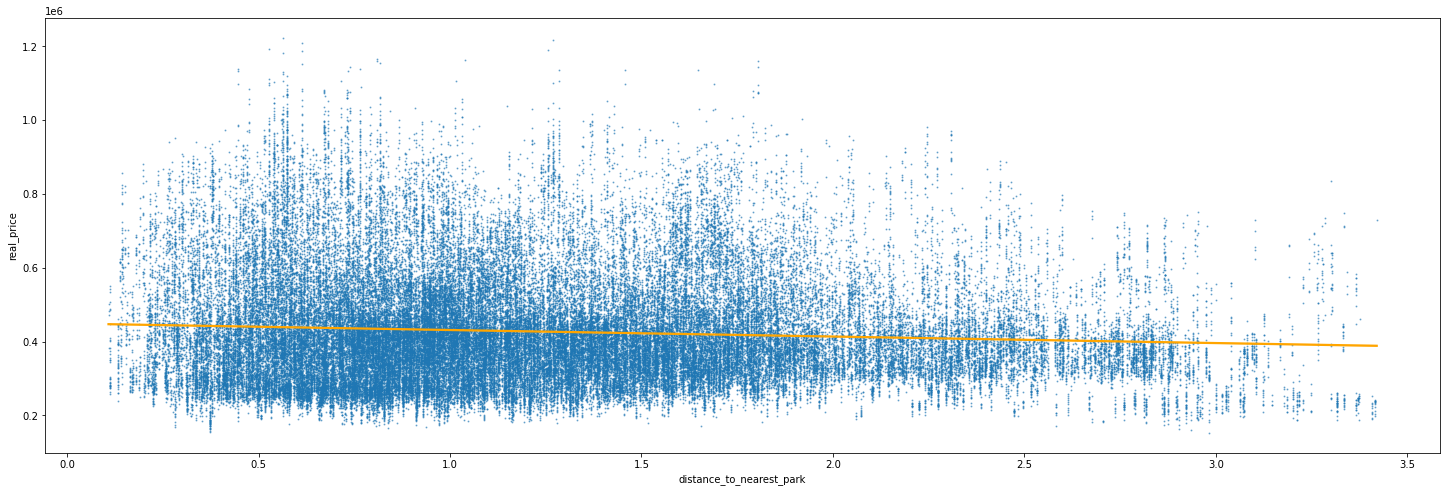

In [67]:
fig = plt.figure(figsize=(25,8))
sns.regplot(x='distance_to_nearest_park', y='real_price', data=train_df_EDA, scatter_kws={"s": 1, 'alpha':0.5}, line_kws={"color": "orange"})


In [68]:
train_df_EDA.columns

Index(['year', 'month', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'resale_price', 'remaining_lease', 'real_price', 'region',
       'flat_model_replaced', 'lease_age', 'address', 'nearest_school',
       'distance_to_nearest_school', '# of schools within radius',
       'nearest_mrt_station', 'distance_to_nearest_MRT',
       '# of stations within radius', 'nearest_mall',
       'distance_to_nearest_mall', '#_of_malls_within_radius', 'nearest_park',
       'distance_to_nearest_park', '#_of_parks_within_radius'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Heatmap')

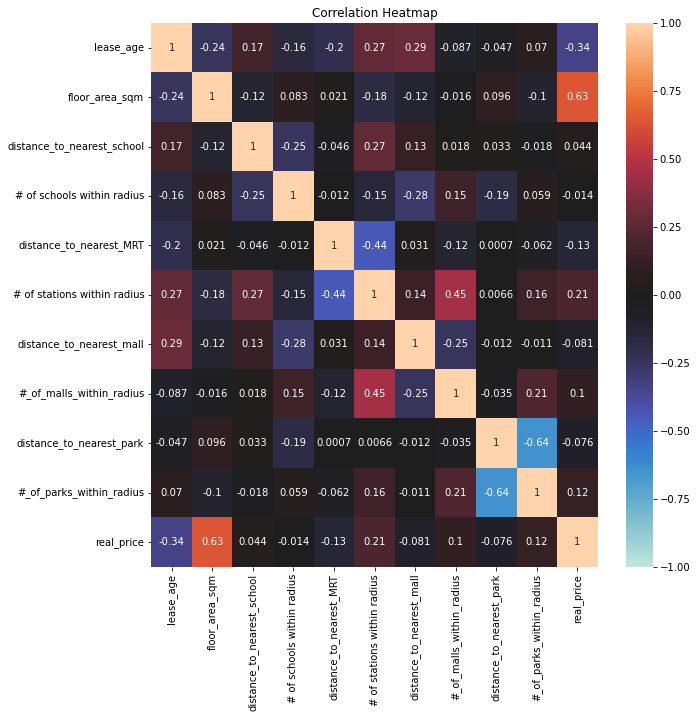

In [69]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(train_df_EDA[['lease_age','floor_area_sqm',
                         'distance_to_nearest_school','# of schools within radius',
                         'distance_to_nearest_MRT','# of stations within radius',
                         'distance_to_nearest_mall', '#_of_malls_within_radius',
                         'distance_to_nearest_park', '#_of_parks_within_radius',
                         'real_price']].corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.title('Correlation Heatmap')

<AxesSubplot:>

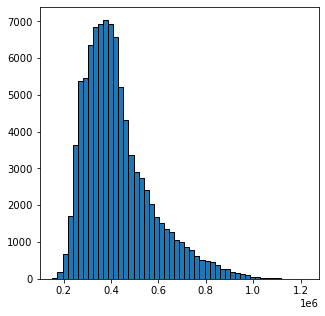

In [70]:
train_df_EDA["real_price"].hist(bins=50, figsize=(5, 5), grid=False, edgecolor='black')


<AxesSubplot:>

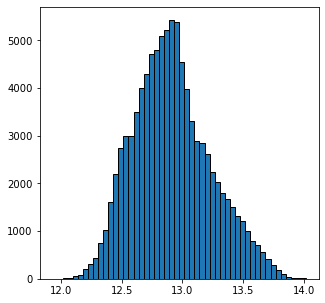

In [71]:
np.log(train_df_EDA["real_price"]).hist(bins=50, figsize=(5, 5), grid=False, edgecolor='black')
